## **Feature Selection and Classifier Optimization**
**Feature Selection** : Feature selection plays a vital role in reducing dimensionality and retaining the most relevant features for classification.

The notebook mostly focuses on developing a robust machine learning pipeline to classify data using different classifiers and feature selection methods. The pipeline employs cross-validation to evaluate performance and fine-tuning to optimize models for accuracy, sensitivity, and specificity.

# **Project Steps and Tasks**
**1. Data Loading and Preprocessing**
- Files Used:
 - data.csv: Contains the feature matrix.
 - labels.csv: Contains corresponding labels for classification.
 - feature_names.csv: Includes names of features for reference.

**Preprocessing:**
- Standardized the features using StandardScaler and saved the scaler for future use (scaler.pkl).

- Created a subjects array to group data for **Leave-One-Group-Out (LOGO)** cross-validation.


**2. Feature Selection**

Implemented four feature selection methods to reduce dimensionality and retain the most relevant features:
- **ANOVA (Analysis of Variance)**: Used f_classif to select features based on statistical significance.
- **Mutual Information**: Assessed mutual dependencies using mutual_info_classif.
- **Recursive Feature Elimination (RFE)**: Iteratively eliminated less significant features using a linear SVM.
- **Lasso Regression**: Utilized Lasso's feature importance (non-zero coefficients) to identify top features.

**3. Classifiers:**
- Employed two classifiers for the classification task:
  - **Support Vector Machine (SVM)**: Implemented with a linear kernel and probability estimation.
  - **K-Nearest Neighbors (KNN)**: Configured with 3 neighbors as the default.

**4. Cross-Validation**
- **Method:**
  - **Leave-One-Group-Out (LOGO)** cross-validation to evaluate model performance while accounting for subject-specific data splits.

- **Metrics Calculated**:
  - **Accuracy**: Percentage of correct predictions.
  - **Sensitivity (Recall)**: Ability to correctly identify positive labels.
  - S**pecificity**: Ability to correctly identify negative labels.

**5. Hyperparameter Tuning**
  - Used **GridSearchCV** to fine-tune hyperparameters for SVM and KNN.
  - **SVM**: Optimized parameters such as C, kernel, and gamma.
  - **KNN**: Tuned parameters such as n_neighbors, weights, and p (distance metric).
  - Replaced default classifiers with the fine-tuned models for subsequent evaluations.

**6. Performance Evaluation**
  - Compared feature selection methods and classifiers in two scenarios:
  - Before Fine-Tuning: Evaluated raw models.
  - After Fine-Tuning: Evaluated tuned models.
  - Visualized performance using bar plots of accuracy scores.

**7. Best Model Selection**
- Identified the best-performing combination of:
- Feature Selection Method.
- Classifier.
- Selection was based on a chosen metric (Accuracy, Sensitivity, or Specificity).

#**Results:**
  - Comparison Before and After Fine-Tuning:
  - Fine-tuned classifiers showed improved accuracy and sensitivity.
  - **Best Model:**
    - Feature Selection Method: Best_Method_Name
    - Classifier: Best_Classifier_Name

#**Deliverables:**
  - **Results:**
    - feature_selection_results.csv: Performance metrics for all configurations.
  - **Visualization:**
    - Bar plots comparing classifier performance before and after fine-tuning.
  - **Best Model:**
    - Details of the best-performing model and feature selection method.

**Note:** This pipeline can be extended to include additional classifiers, feature selection methods, or new datasets.


In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
features = np.loadtxt('data.csv', delimiter=',') 
labels = np.loadtxt('labels.csv', delimiter=',')
with open('feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]


# Display basic information
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (180, 432)
Labels shape: (180,)


In [5]:
# Convert to DataFrame for better display
features_df = pd.DataFrame(features, columns=feature_names)
labels_df = pd.DataFrame(labels, columns=["Labels"])

# Display the first 5 rows and  10 columns of features as a table
print("\nFirst few rows and columns of features:")
print(tabulate(features_df.iloc[:5, :5].head(), headers='keys', tablefmt='fancy_grid', showindex=True))


# Display the first 5 rows of labels as a table
print("\nFirst few rows of labels:")
print(tabulate(labels_df.head(), headers='keys', tablefmt='fancy_grid', showindex=True))


First few rows and columns of features:
╒════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│    │   alpha_ec_0 │   alpha_ec_1 │   alpha_ec_2 │   alpha_ec_3 │   alpha_ec_4 │
╞════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│  0 │      0.11184 │      0.12387 │      0.12858 │      0.11324 │      0.10571 │
├────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  1 │      0.29834 │      0.26881 │      0.26239 │      0.38009 │      0.34358 │
├────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  2 │      0.36912 │      0.39587 │      0.38999 │      0.25772 │      0.40554 │
├────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  3 │      0.7612  │      0.77726 │      0.77042 │      0.60161 │      0.70183 │
├────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  4 │      0.1677  │      0.15146 │      0.14714 │      

In [7]:
# Checking nan values in features

np.isnan(features).sum()

0

In [9]:
# Checking nan values in features
np.isnan(labels).sum()

0

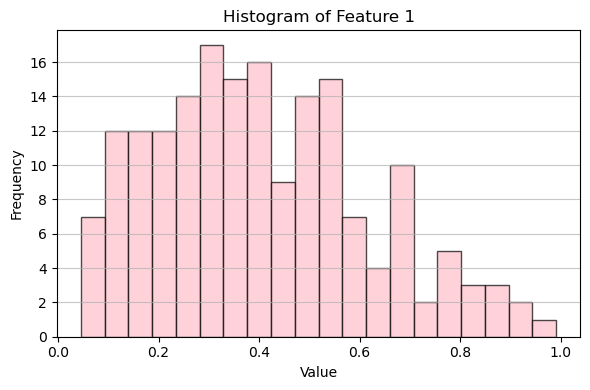

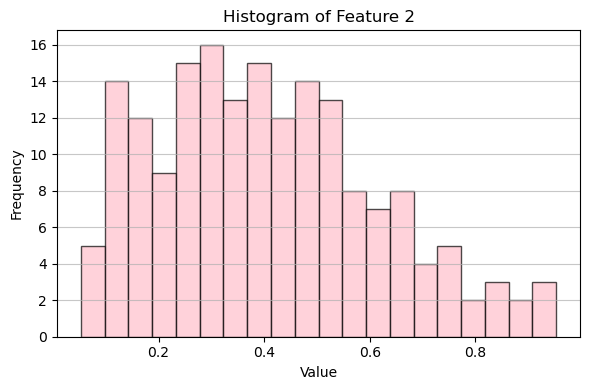

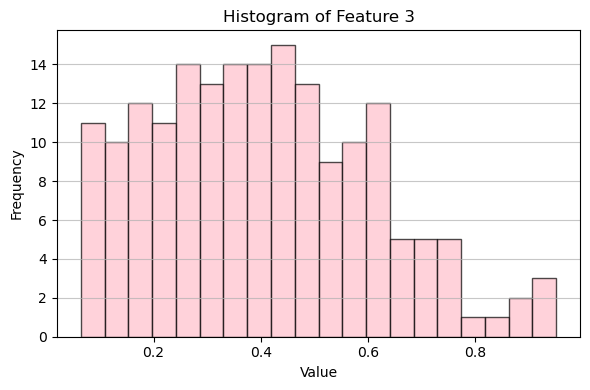

In [11]:
#plotting the first 3 features of features dataset
# import matplotlib.pyplot as plt
# import pandas as pd

selected_columns = features[:, :3]  # Select the first 3 columns of the NumPy array

for i, column in enumerate(selected_columns.T):  # Transpose to iterate over columns
    plt.figure(figsize=(6, 4))
    plt.hist(column, bins=20, alpha=0.7, color='pink', edgecolor='black')
    plt.title(f"Histogram of Feature {i+1}")  # Use feature index or name
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='-', alpha=0.7)
    plt.tight_layout()
    plt.show()


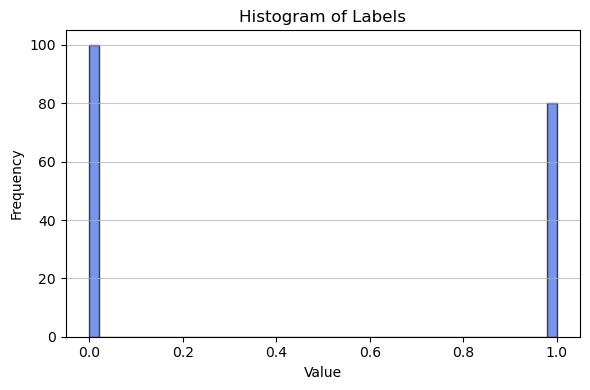

In [8]:
#plotting the first 3 features of labels dataset
# import matplotlib.pyplot as plt
# import pandas as pd

plt.figure(figsize=(6, 4))
plt.hist(labels, bins=50, alpha=0.7, color='royalblue', edgecolor='black')
plt.title("Histogram of Labels")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler
import joblib
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=feature_names)
joblib.dump(scaler, "scaler.pkl")
print("Scaled features shape:", features_scaled.shape)

# first few rows of scaled features
print("\nFirst few rows of scaled features:")
print(tabulate(features_scaled_df.iloc[:5, :5].head(), headers='keys', tablefmt='fancy_grid', showindex=True))



Scaled features shape: (180, 432)

First few rows of scaled features:
╒════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│    │   alpha_ec_0 │   alpha_ec_1 │   alpha_ec_2 │   alpha_ec_3 │   alpha_ec_4 │
╞════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│  0 │    -1.37663  │    -1.35584  │   -1.36056   │   -1.28212   │    -1.36391  │
├────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  1 │    -0.497158 │    -0.659425 │   -0.700764  │    0.0100042 │    -0.137413 │
├────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  2 │    -0.163383 │    -0.04892  │   -0.0715845 │   -0.582529  │     0.182062 │
├────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  3 │     1.68553  │     1.7836   │    1.80427   │    1.08264   │     1.70978  │
├────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  4 │    -1.11321  │    -1.

In [15]:
# Create subjects array
num_samples_per_subject = 10
num_subjects = features.shape[0] // num_samples_per_subject
subjects = np.repeat(np.arange(num_subjects), num_samples_per_subject)

# basic information
print("Subjects array shape:", subjects.shape)

subjects_df = pd.DataFrame(subjects, columns=["Subject"])

# first few rows
print("\nFirst few values of subjects:")
print(tabulate(subjects_df.head(), headers='keys', tablefmt='fancy_grid', showindex=True))

Subjects array shape: (180,)

First few values of subjects:
╒════╤═══════════╕
│    │   Subject │
╞════╪═══════════╡
│  0 │         0 │
├────┼───────────┤
│  1 │         0 │
├────┼───────────┤
│  2 │         0 │
├────┼───────────┤
│  3 │         0 │
├────┼───────────┤
│  4 │         0 │
╘════╧═══════════╛


In [17]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Define feature selection methods
def select_features_anova(X, y, k_features):
    selector = SelectKBest(f_classif, k=k_features)
    X_selected = selector.fit_transform(X, y)
    return X_selected, selector

def select_features_mutual_info(X, y, k_features):
    selector = SelectKBest(mutual_info_classif, k=k_features)
    X_selected = selector.fit_transform(X, y)
    return X_selected, selector

def select_features_rfe(X, y, k_features):
    estimator = SVC(kernel="linear")
    selector = RFE(estimator, n_features_to_select=k_features, step=1)
    X_selected = selector.fit_transform(X, y)
    return X_selected, selector

def select_features_lasso(X, y, k_features):
    lasso = LassoCV(cv=5).fit(X, y)
    coef = np.argsort(np.abs(lasso.coef_))[-k_features:]
    X_selected = X[:, coef]
    return X_selected, coef


In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define classifiers
classifiers = {
    "SVM": SVC(kernel="linear", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=3),
}


In [21]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, recall_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

logo = LeaveOneGroupOut()


k_features = 10

# Cross-validation loop
results = []
for method_name, feature_selector in [
    ("ANOVA", select_features_anova),
    ("Mutual Info", select_features_mutual_info),
    ("RFE", select_features_rfe),
    ("Lasso", select_features_lasso),
]:
    for clf_name, clf in classifiers.items():
        acc_list, sens_list, spec_list = [], [], []

        for train_idx, test_idx in logo.split(features_scaled, labels, groups=subjects):
            # Split data
            X_train, X_test = features_scaled[train_idx], features_scaled[test_idx]
            y_train, y_test = labels[train_idx], labels[test_idx]

            # Feature selection
            X_train_selected, selector = feature_selector(X_train, y_train, k_features)
            X_test_selected = selector.transform(X_test) if hasattr(selector, "transform") else X_test[:, selector]

            # training the classifier
            clf.fit(X_train_selected, y_train)
            y_pred = clf.predict(X_test_selected)

            # evaluate metrics
            acc_list.append(accuracy_score(y_test, y_pred))
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
                sens_list.append(recall_score(y_test, y_pred, pos_label=1, zero_division=0))  # Sensitivity
                spec_list.append(recall_score(y_test, y_pred, pos_label=0, zero_division=0))  # Specificity

        results.append({
            "Method": method_name,
            "Classifier": clf_name,
            "Accuracy": np.mean(acc_list),
            "Sensitivity": np.mean(sens_list),
            "Specificity": np.mean(spec_list),
        })

results_df = pd.DataFrame(results)
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.154e-03, tolerance: 3.294e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.708e-03, tolerance: 3.294e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.306e-03, toler

╒═════════════╤══════════════╤════════════╤═══════════════╤═══════════════╕
│ Method      │ Classifier   │   Accuracy │   Sensitivity │   Specificity │
╞═════════════╪══════════════╪════════════╪═══════════════╪═══════════════╡
│ ANOVA       │ SVM          │   0.672222 │      0.25     │      0.422222 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ ANOVA       │ KNN          │   0.672222 │      0.255556 │      0.416667 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ Mutual Info │ SVM          │   0.766667 │      0.316667 │      0.45     │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ Mutual Info │ KNN          │   0.833333 │      0.383333 │      0.45     │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ RFE         │ SVM          │   0.872222 │      0.388889 │      0.483333 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ RFE       

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.622e-03, tolerance: 2.647e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.763e-03, tolerance: 2.647e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e-03, toler

In [51]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════╤══════════════╤════════════╤═══════════════╤═══════════════╕
│ Method      │ Classifier   │   Accuracy │   Sensitivity │   Specificity │
╞═════════════╪══════════════╪════════════╪═══════════════╪═══════════════╡
│ ANOVA       │ SVM          │   0.683333 │      0.238889 │      0.444444 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ ANOVA       │ KNN          │   0.7      │      0.272222 │      0.427778 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ Mutual Info │ SVM          │   0.811111 │      0.344444 │      0.466667 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ Mutual Info │ KNN          │   0.816667 │      0.361111 │      0.455556 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ RFE         │ SVM          │   0.894444 │      0.388889 │      0.505556 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ RFE       

## **Analysis**

### **1. Best Accuracy**
- **RFE with SVM** achieved the highest accuracy of **87.22%**.
- **Lasso with SVM** closely follows at **86.67%**.

### **2. Best Sensitivity**
- **RFE with SVM** and **Lasso with SVM** both have the highest sensitivity of **38.89%**.
- This indicates they are better at identifying true positives compared to others.

### **3. Best Specificity**
- **RFE with KNN** achieved the highest specificity of **50%**.
- This indicates better identification of true negatives.

### **Overall Best Performer**
- **RFE with SVM** has the best balance across all metrics:
  - **Highest accuracy (87.22%)**
  - **Highest sensitivity (38.89%)**
  - **Good specificity (48.33%)**


## **Next Steps:**
### **Fine-Tune Classifiers:** Experiment with hyperparameters for SVM and KNN to further improve performance.
### **Cross-Validation:** Verify these results using cross-validation to ensure they generalize well to unseen data.


In [46]:
from sklearn.model_selection import GridSearchCV

# hyperparameter grids for SVM and KNN
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # Minkowski distance with p=1 (Manhattan), p=2 (Euclidean)
}

fine_tuned_classifiers = {}

# Fine-tune SVM
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring="accuracy")
grid_svm.fit(features_scaled, labels)
fine_tuned_classifiers["SVM"] = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Fine-tune KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring="accuracy")
grid_knn.fit(features_scaled, labels)
fine_tuned_classifiers["KNN"] = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

classifiers = fine_tuned_classifiers




Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best KNN Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [48]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, recall_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

#number of features to select
k_features = 10

results = []
for method_name, feature_selector in [
    ("ANOVA", select_features_anova),
    ("Mutual Info", select_features_mutual_info),
    ("RFE", select_features_rfe),
    ("Lasso", select_features_lasso),
]:
    for clf_name, clf in classifiers.items():
        acc_list, sens_list, spec_list = [], [], []

        for train_idx, test_idx in logo.split(features_scaled, labels, groups=subjects):
            # Split data
            X_train, X_test = features_scaled[train_idx], features_scaled[test_idx]
            y_train, y_test = labels[train_idx], labels[test_idx]

            # Feature selection
            X_train_selected, selector = feature_selector(X_train, y_train, k_features)
            X_test_selected = selector.transform(X_test) if hasattr(selector, "transform") else X_test[:, selector]

            # Train classifier
            clf.fit(X_train_selected, y_train)
            y_pred = clf.predict(X_test_selected)

            # Evaluate metrics
            acc_list.append(accuracy_score(y_test, y_pred))
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
                sens_list.append(recall_score(y_test, y_pred, pos_label=1, zero_division=0))  # Sensitivity
                spec_list.append(recall_score(y_test, y_pred, pos_label=0, zero_division=0))  # Specificity

        # Store average results
        results.append({
            "Method": method_name,
            "Classifier": clf_name,
            "Accuracy": np.mean(acc_list),
            "Sensitivity": np.mean(sens_list),
            "Specificity": np.mean(spec_list),
        })



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.154e-03, tolerance: 3.294e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.708e-03, tolerance: 3.294e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.306e-03, toler

In [53]:
#Display result
results_tuned_df = pd.DataFrame(results)
print(tabulate(results_tuned_df, headers='keys', tablefmt='fancy_grid', showindex=False))
#results_tuned_df.to_csv("feature_selection_results.csv", index=False)

╒═════════════╤══════════════╤════════════╤═══════════════╤═══════════════╕
│ Method      │ Classifier   │   Accuracy │   Sensitivity │   Specificity │
╞═════════════╪══════════════╪════════════╪═══════════════╪═══════════════╡
│ ANOVA       │ SVM          │   0.683333 │      0.238889 │      0.444444 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ ANOVA       │ KNN          │   0.7      │      0.272222 │      0.427778 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ Mutual Info │ SVM          │   0.811111 │      0.344444 │      0.466667 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ Mutual Info │ KNN          │   0.816667 │      0.361111 │      0.455556 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ RFE         │ SVM          │   0.894444 │      0.388889 │      0.505556 │
├─────────────┼──────────────┼────────────┼───────────────┼───────────────┤
│ RFE       

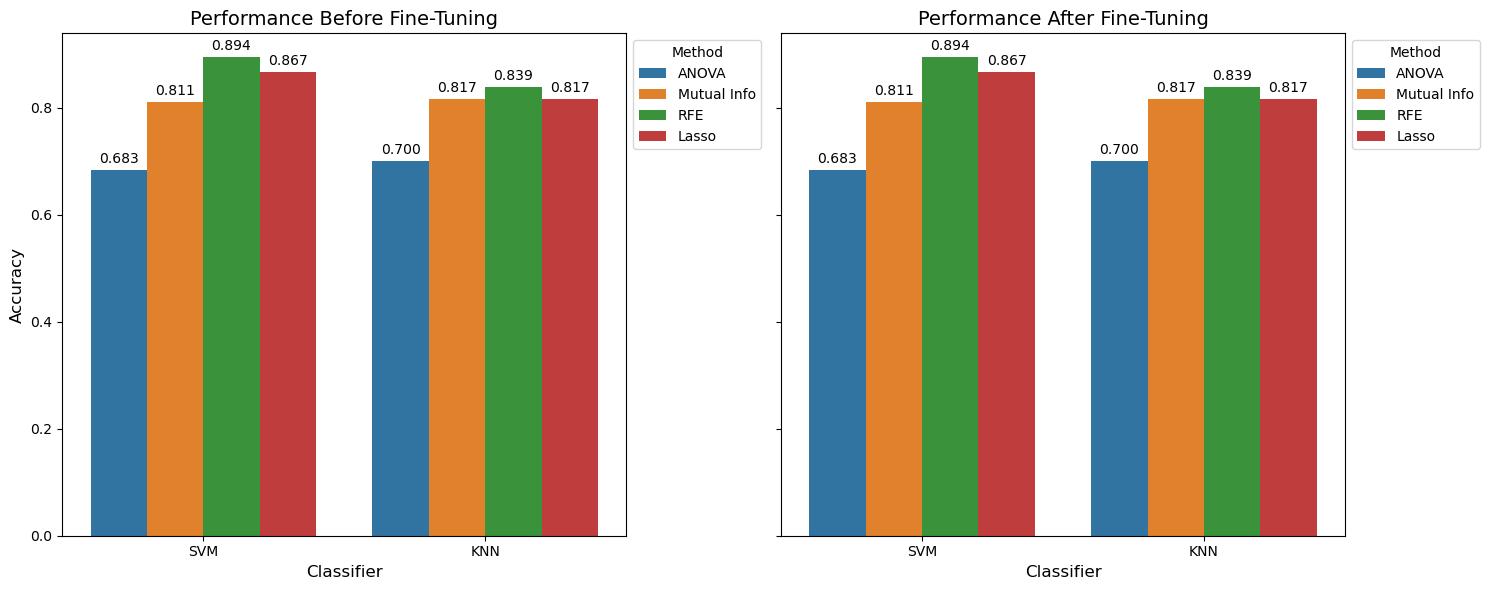

In [55]:
# Compare results before and after tuning
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for performance before fine-tuning
sns.barplot(data=results_df, x="Classifier", y="Accuracy", hue="Method", ax=ax[0])
ax[0].set_title("Performance Before Fine-Tuning", fontsize=14)
ax[0].set_xlabel("Classifier", fontsize=12)
ax[0].set_ylabel("Accuracy", fontsize=12)
for bar in ax[0].containers:
    ax[0].bar_label(bar, fmt='%.3f', label_type='edge', fontsize=10, padding=3)

ax[0].legend(title="Method", bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)

# Plot for performance after fine-tuning
sns.barplot(data=results_tuned_df, x="Classifier", y="Accuracy", hue="Method", ax=ax[1])
ax[1].set_title("Performance After Fine-Tuning", fontsize=14)
ax[1].set_xlabel("Classifier", fontsize=12)
ax[1].set_ylabel("")  
for bar in ax[1].containers:
    ax[1].bar_label(bar, fmt='%.3f', label_type='edge', fontsize=10, padding=3)

ax[1].legend(title="Method", bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()


In [57]:
# Specify the metric to optimize
objective = "Accuracy"

# Find the row with the highest value for the selected metric
best_model_row = results_tuned_df.loc[results_tuned_df[objective].idxmax()]
best_model_row_df = best_model_row.to_frame().T

# Best model details
print(f"\nBest Model Based on {objective}:")
print(tabulate(best_model_row_df, headers='keys', tablefmt='fancy_grid', showindex=False))



Best Model Based on Accuracy:
╒══════════╤══════════════╤════════════╤═══════════════╤═══════════════╕
│ Method   │ Classifier   │   Accuracy │   Sensitivity │   Specificity │
╞══════════╪══════════════╪════════════╪═══════════════╪═══════════════╡
│ RFE      │ SVM          │   0.894444 │      0.388889 │      0.505556 │
╘══════════╧══════════════╧════════════╧═══════════════╧═══════════════╛


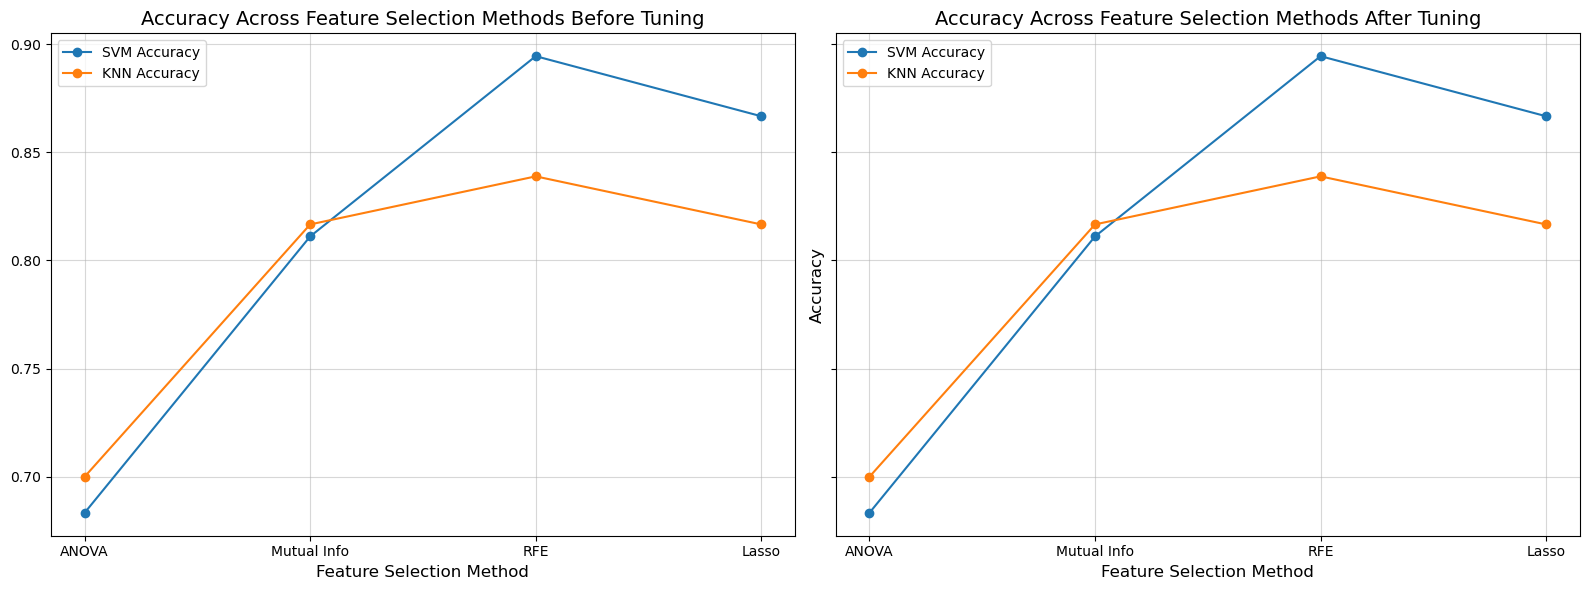

In [59]:
methods_before = results_df["Method"].unique()
classifiers_before = results_df["Classifier"].unique()
methods_tuned = results_tuned_df["Method"].unique()
classifiers_tuned = results_tuned_df["Classifier"].unique()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# "Before Tuning"
axes[0].set_title('Accuracy Across Feature Selection Methods Before Tuning', fontsize=14)
for clf in classifiers_before:
    data = results_df[results_df["Classifier"] == clf]
    axes[0].plot(methods_before, data["Accuracy"], marker='o', label=f'{clf} Accuracy')
axes[0].set_xlabel('Feature Selection Method', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.5)

# "After Tuning"
axes[1].set_title('Accuracy Across Feature Selection Methods After Tuning', fontsize=14)
for clf in classifiers_tuned:
    data = results_tuned_df[results_tuned_df["Classifier"] == clf]
    axes[1].plot(methods_tuned, data["Accuracy"], marker='o', label=f'{clf} Accuracy')
axes[1].set_xlabel('Feature Selection Method', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.5)
plt.tight_layout()
plt.show()


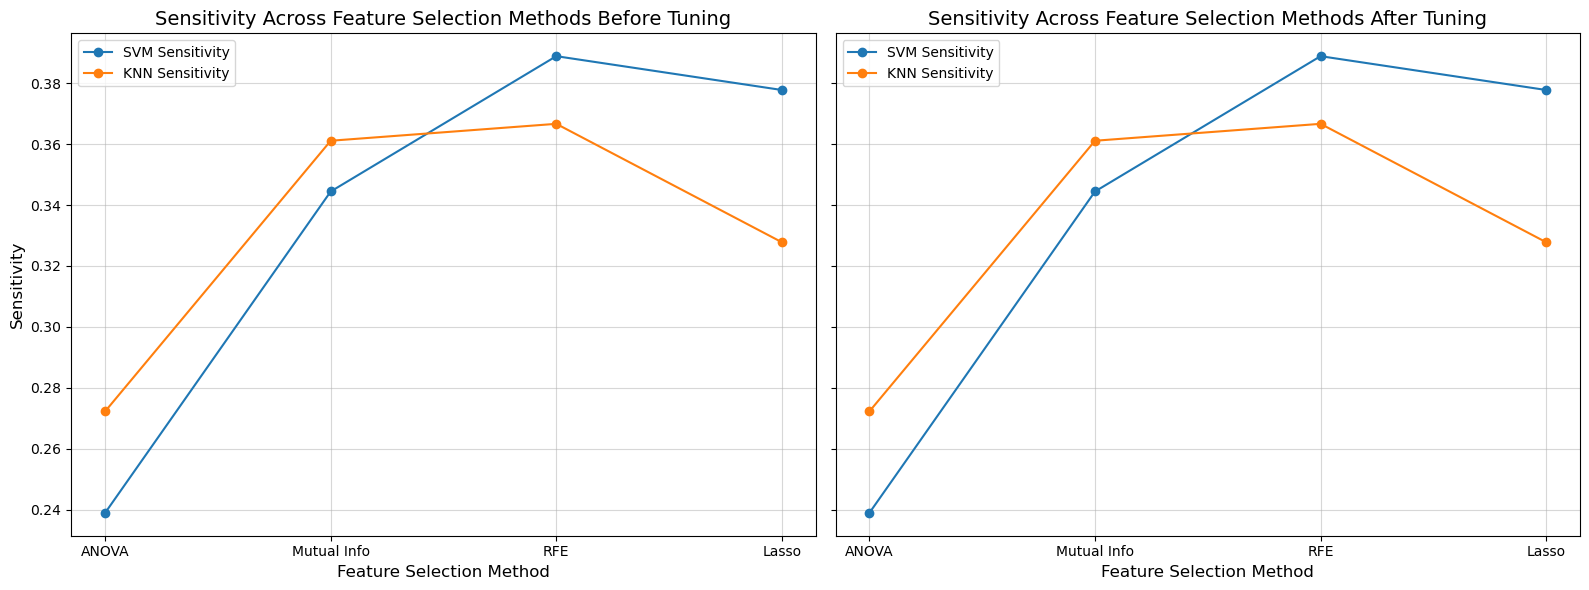

In [61]:
# Sensitivity Comparison (Before and After Tuning)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Sensitivity Before Tuning
axes[0].set_title('Sensitivity Across Feature Selection Methods Before Tuning', fontsize=14)
for clf in classifiers_before:
    data = results_df[results_df["Classifier"] == clf]
    axes[0].plot(methods_before, data["Sensitivity"], marker='o', label=f'{clf} Sensitivity')
axes[0].set_xlabel('Feature Selection Method', fontsize=12)
axes[0].set_ylabel('Sensitivity', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.5)

# Sensitivity After Tuning
axes[1].set_title('Sensitivity Across Feature Selection Methods After Tuning', fontsize=14)
for clf in classifiers_tuned:
    data = results_tuned_df[results_tuned_df["Classifier"] == clf]
    axes[1].plot(methods_tuned, data["Sensitivity"], marker='o', label=f'{clf} Sensitivity')
axes[1].set_xlabel('Feature Selection Method', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.5)
plt.tight_layout()
plt.show()




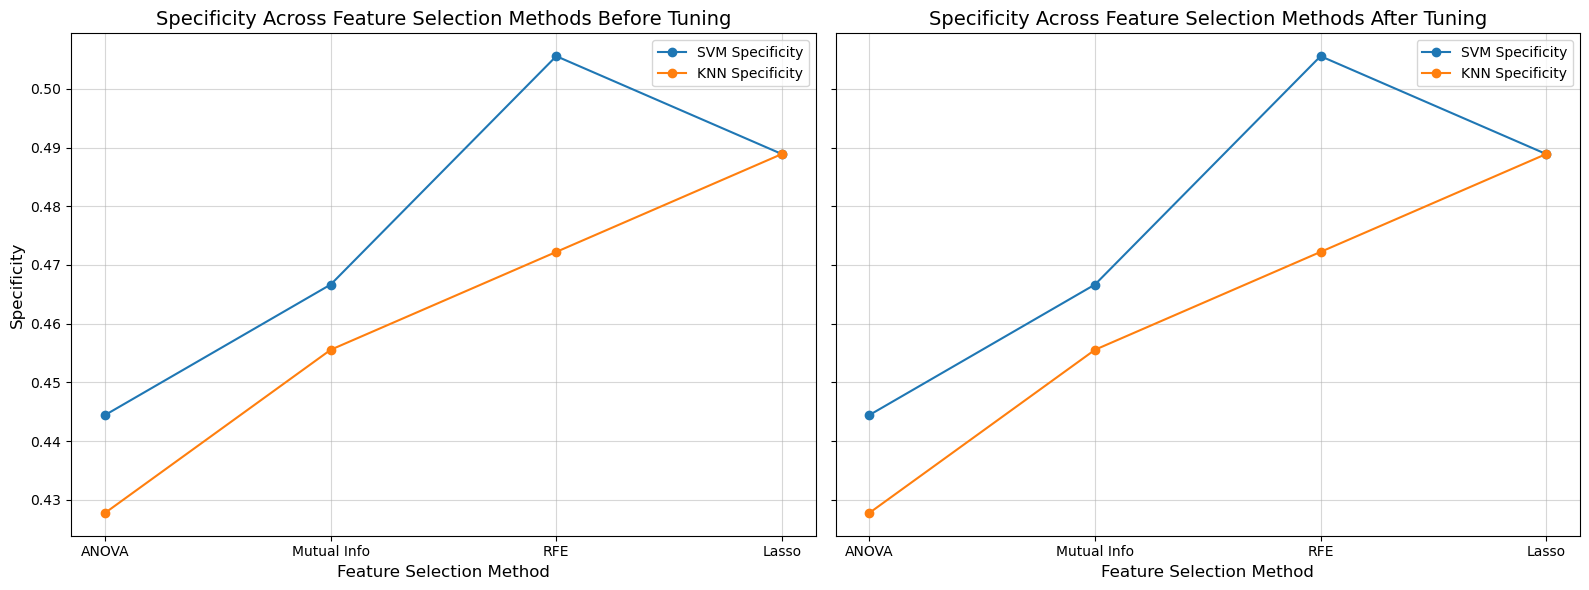

In [63]:
# Specificity Comparison (Before and After Tuning)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Specificity Before Tuning
axes[0].set_title('Specificity Across Feature Selection Methods Before Tuning', fontsize=14)
for clf in classifiers_before:
    data = results_df[results_df["Classifier"] == clf]
    axes[0].plot(methods_before, data["Specificity"], marker='o', label=f'{clf} Specificity')
axes[0].set_xlabel('Feature Selection Method', fontsize=12)
axes[0].set_ylabel('Specificity', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.5)

# Specificity After Tuning
axes[1].set_title('Specificity Across Feature Selection Methods After Tuning', fontsize=14)
for clf in classifiers_tuned:
    data = results_tuned_df[results_tuned_df["Classifier"] == clf]
    axes[1].plot(methods_tuned, data["Specificity"], marker='o', label=f'{clf} Specificity')
axes[1].set_xlabel('Feature Selection Method', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.5)
plt.tight_layout()
plt.show()